## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("./Mouse_metadata.csv")
study_results_path = ("./Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data =pd.merge(mouse_metadata, study_results, how="left")
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
num_mice= data['Mouse ID'].count()
print(num_mice)

1893


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data[data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
allduplicate = data[data.duplicated(['Mouse ID'])]
allduplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop = data.drop_duplicates('Mouse ID')
drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
clean = drop['Mouse ID'].count()
clean = pd.DataFrame({"# Mice": [clean]})
clean

,# Mice
0,249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary = pd.DataFrame(data.groupby("Drug Regimen").count())
summary ["Mean"] = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary ["Median"] = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary ["Variance"] = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary ["Standard Deviation"] = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary ["SEM"] = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
# Assemble the resulting series into a single summary dataframe.
summary= summary[["Mean","Median","Variance","Standard Deviation","SEM"]]
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
aggregation_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

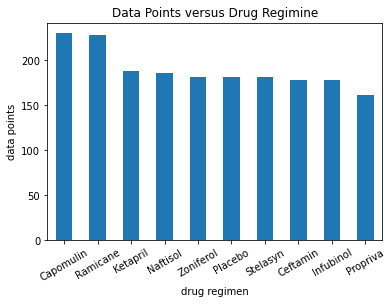

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data2 = data.copy()
data3 = data["Drug Regimen"].value_counts()

bar1 = data3.plot.bar(x= 'Drug Regimen', rot=30, title = 'Data Points versus Drug Regimine')
plt.xlabel('drug regimen')
plt.ylabel('data points')

bar1

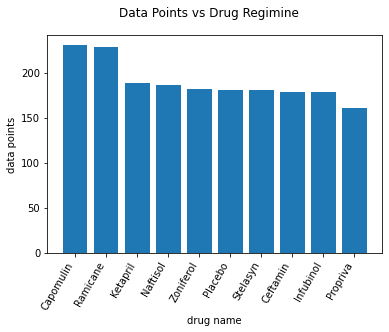

,drug name,counts
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182


In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data3 = data2["Drug Regimen"].value_counts().rename_axis('drug name').reset_index(name='counts')
plt.bar(data3["drug name"], data3["counts"])
plt.suptitle('Data Points vs Drug Regimine')
plt.setp(plt.gca().get_xticklabels(), rotation=60, horizontalalignment='right')
plt.ylabel('data points')
plt.xlabel('drug name')
plt.show()
data3.head()


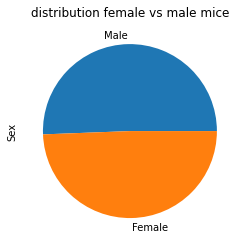

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data4 = data2["Sex"].value_counts()
pie = data4.plot.pie(title = 'distribution female vs male mice')
pie


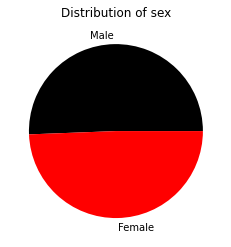

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
colors = ["black", "red"]
plt.pie(data4, labels= labels, colors=colors)
plt.title("Distribution of sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen = data[data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
regimen = regimen.sort_values(["Timepoint"],ascending = False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
summary_timepoint = regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
summary_timepoint

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_tumor = []
counter = 0

for drug in drugs:
    drug_list = summary_timepoint.loc[summary_timepoint['Drug Regimen'] == drug]

# add subset
    # aka create data frame for finding the end timepoint for the drugs listed
#     end_tp_df = drug_list.loc[drug_list['Timepoint']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # create a series for each drug on end volumes
    end_volume = drug_list['Tumor Volume (mm3)']
    drug_tumor.append(end_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = end_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq)
    
    # Find the upper and lower bounds to determine outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = (end_volume.loc[(drug_list['Tumor Volume (mm3)'] >= upper_bound) | 
                               (drug_list['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    if counter == 0:
        print(f'----------------------------------------------------')
    print(f'For {drug} the IQR is:')
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    print(f'The interquartile range of {drug} is: {iqr}')
    print(f'Values below {lower_bound} for {drug} could be outliers.')
    print(f'Values above {upper_bound} for {drug} could be outliers.')
    print(f'----------------------------------------------------')
    counter += 1


----------------------------------------------------
For Capomulin the IQR is:
Lower Bound for Capomulin: 26.714832162499995
Upper Bound for Capomulin: 55.9711007025
The interquartile range of Capomulin is: 7.314067135000002
Values below 26.714832162499995 for Capomulin could be outliers.
Values above 55.9711007025 for Capomulin could be outliers.
----------------------------------------------------
For Ramicane the IQR is:
Lower Bound for Ramicane: 24.18658646249998
Upper Bound for Ramicane: 57.48804812250001
The interquartile range of Ramicane is: 8.325365415000007
Values below 24.18658646249998 for Ramicane could be outliers.
Values above 57.48804812250001 for Ramicane could be outliers.
----------------------------------------------------
For Infubinol the IQR is:
Lower Bound for Infubinol: 32.309217298749985
Upper Bound for Infubinol: 72.31757996875001
The interquartile range of Infubinol is: 10.002090667500006
Values below 32.309217298749985 for Infubinol could be outliers.
Value

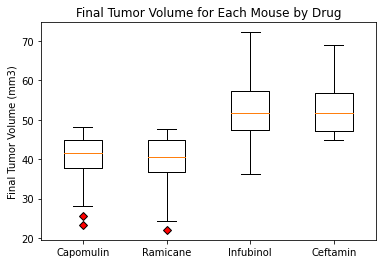

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D', markersize=6, markeredgecolor='black')
plt.boxplot(drug_tumor, flierprops=red_diamond)
plt.title('Final Tumor Volume for Each Mouse by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

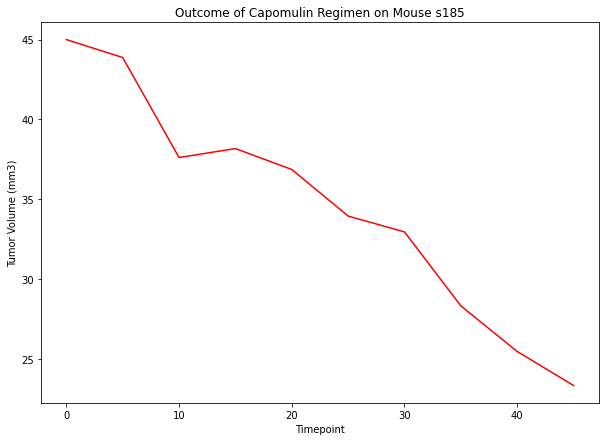

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capoulin
capomulin_df = data.loc[(data['Drug Regimen'] == 'Capomulin'), :] 
s185_df = capomulin_df.loc[data['Mouse ID'] == 's185',:]
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'], color="r")
ax4.set(xlabel='Timepoint', ylabel='Tumor Volume (mm3)', title='Outcome of Capomulin Regimen on Mouse s185');

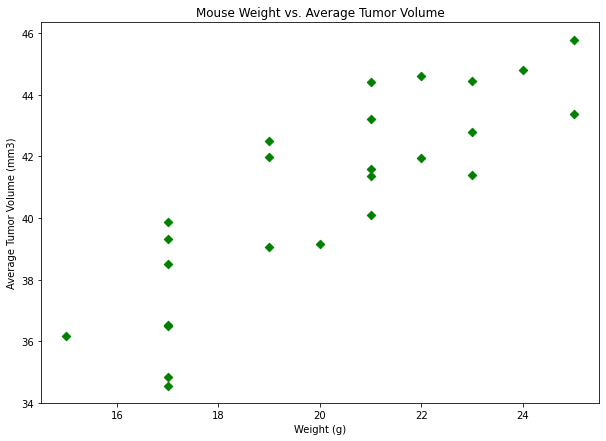

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume_df = capomulin_df.groupby(['Mouse ID']).mean()

# Generate plot
fig5, ax5 = plt.subplots(figsize=(10, 7))
ax5.scatter(avg_tumor_volume_df['Weight (g)'],avg_tumor_volume_df['Tumor Volume (mm3)'], marker='D', color='g')
ax5.set(xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)', title='Mouse Weight vs. Average Tumor Volume');

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
Weight = data.iloc[:,4]
Tumor = data.iloc[:,6]
correlation = st.pearsonr(Weight,Tumor)

print(f"The correlation between both factors is {round(correlation[0],2)}")


# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.59


In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(data['Weight (g)'], data['Tumor Volume (mm3)'])
regression_values = avg_tumor_volume_df['Weight (g)'] * slope + intercept

fig6, ax6 = plt.subplots(figsize=(10, 7))
ax6.scatter(avg_tumor_volume_df['Weight (g)'],avg_tumor_volume_df['Tumor Volume (mm3)'], marker='D', color='g')
ax6.plot(avg_tumor_volume_df['Weight (g)'], regression_values, "b-)
ax6.set(xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)', title='Mouse Weight vs. Average Tumor Volume');
ax6.annotate(line_eq, xy=(22, 37), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', color="red");

SyntaxError: EOL while scanning string literal (<ipython-input-23-7664e525cf25>, line 6)